<a href="https://colab.research.google.com/github/cheung0/Air-Quality-Prediction/blob/main/Predicting_Good_Baked_Chicken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A small neural network using Tensorflow inspired by good coffee roast prediction.

I was trying to bake chicken in the oven. I'm pretty bad at guessing the best time and temperature settings, so I wrote a machine learning program to figure it out for me.

Synthetic data generated with inspiration from:

https://www.spendwithpennies.com/oven-baked-chicken-breasts/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def load_chicken_data():
  # (low, high], size
  # 350 - 450 degrees at 22 - 26 minutes
  duration1 = np.random.uniform(22, 26, 200)
  temperature1 = np.random.uniform(350, 450, 200)

  # 300 - 400 degrees at 25 - 30 minutes
  duration2 = np.random.uniform(25, 30, 200)
  temperature2 = np.random.uniform(300, 400, 200)
  ones = np.ones((400,), dtype=int)

  duration3 = np.random.uniform(0, 20, 200)
  temperature3 = np.random.uniform(300, 450, 200)

  duration4 = np.random.uniform(30, 60, 200)
  temperature4 = np.random.uniform(300, 450, 200)
  zeros = np.zeros((400,), dtype=int)

  duration = np.concatenate((duration1, duration2, duration3, duration4))
  temperature = np.concatenate((temperature1, temperature2, temperature3, temperature4))
  X = np.column_stack((temperature, duration))
  Y = np.concatenate((ones, zeros))
  Y = Y.reshape(-1, 1)

  return X, Y

In [3]:
X, Y = load_chicken_data()

In [4]:
def plt_baked():
  # Plotting the data
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='viridis', marker='o', edgecolors='k', label=['Class 0', 'Class 1'])
  plt.xlabel('Temperature')
  plt.ylabel('Duration')
  plt.title('Chicken Roasting Data')
  plt.legend()
  plt.show()

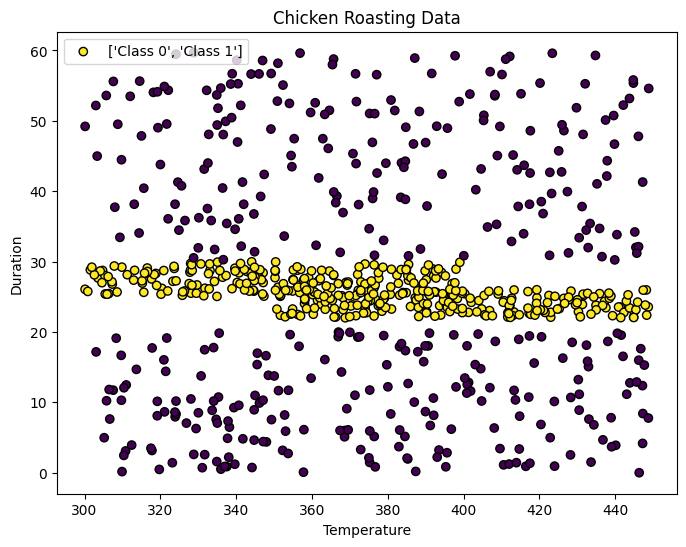

In [5]:
plt_baked()

In [6]:
X, Y = load_chicken_data()
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")

Temperature Max, Min pre normalization: 449.91, 300.58
Duration    Max, Min pre normalization: 59.87, 0.05
Temperature Max, Min post normalization: 1.85, -1.81
Duration    Max, Min post normalization: 1.85, -1.81


In [7]:
# Tile/copy data to increase training set size and reduce number of training epochs
Xt = np.tile(Xn,(10,1))
Yt= np.tile(Y,(10,1))
print(Xt.shape, Yt.shape)

(8000, 2) (8000, 1)


In [8]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.60658294 -0.5210971   0.47970355]
 [ 0.13543129 -0.79878044  0.342546  ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.5163038 ]
 [ 0.35519958]
 [-0.8097456 ]] 
b2(1,): [0.]


In [12]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)

Epoch 1/10
250/250 [==============================] - 5s 8ms/step - loss: 0.6798
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.6128
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.4465
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.2339
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1410
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0963
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0707
Epoch 8/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0545
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0439
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0361


In [13]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 0.16041172  0.04511147 -0.06044884]
 [11.4402     -9.687095   10.717836  ]] 
b1: [ 4.656099  2.924928 -3.094218]
W2:
 [[ 8.867604  ]
 [ 0.93647295]
 [-9.385142  ]] 
b2: [-4.6497154]


In [29]:
# temperature (Fahrenheit), time (minutes)
a = [300, 23]  # good chicken, positive example
b = [40, 400]  # bad chicken, negative example
X_test = np.array([a, b])
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

decisions = (predictions >= 0.5).astype(int)
labels = ['First baked chicken', 'Second baked chicken']
print()
for i, decision in enumerate(decisions):
    print(f'{labels[i]} is {"tasty" if decision == 1 else "not tasty"}. It is baked at {X_test[i][0]} degrees for {X_test[i][1]} minutes.')

1/1 [==============================] - 0s 83ms/step
predictions = 
 [[0.9638935 ]
 [0.00566789]]

First baked chicken is tasty. It is baked at 300 degrees for 23 minutes.
Second baked chicken is not tasty. It is baked at 40 degrees for 400 minutes.
